In [144]:
import sys
from pathlib import Path

try:                                   # regular .py execution
    repo_root = Path(__file__).resolve().parent.parent
except NameError:                      # Jupyter / IPython
    repo_root = Path().resolve().parent

sys.path.append(str(repo_root))
print("Added to sys.path →", repo_root)

Added to sys.path → /Users/joro/src/kth/thesis/jailbreaks


In [145]:
%load_ext autoreload
%autoreload 1
%aimport config, utils
from config import model_map, method_map
from config import heat_map_font_sizes as font_sizes
from utils import heatmap, plot_method_deltas, multi_mean_ci_table


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
method_map

{'diffinmeans': 'Single Refusal Direction Ablation',
 'prefixinjection-3': 'Prefix Injection',
 'baseline': 'Baseline',
 'outputaware-temperature': 'Output-Aware Temperature Sampling',
 'hiddenlayerinjection': 'Config Prompt Injection'}

In [147]:
from jailbreaks.pipeline.steps.aggregate import (
    AggregateConfig,
    aggregate
)

import pandas as pd
import numpy as np
                

## MMLU

In [148]:
output_dir = "../results"
project_name = "mmlu_v1"
eval_run_id = "mmlu_v4"

output_dir = Path(f"{output_dir}/{project_name}")
responses_dir = output_dir / "responses"
evaluations_dir = output_dir / f"evaluations/{eval_run_id}"
aggregated_results_dir = output_dir / f"aggregated_results/{eval_run_id}"

In [149]:
config = AggregateConfig(
    project_name=project_name,
    responses_dir=responses_dir,
    evaluations_dir=evaluations_dir,
    output_dir=aggregated_results_dir,
    eval_run_id=eval_run_id,
    use_local=True
)

In [150]:
mmlu_results = aggregate(config)

2025-06-03 14:26:32,536 - jailbreaks.pipeline.steps.aggregate - INFO - Step 4: Aggregating results from
2025-06-03 14:26:32,537 - jailbreaks.pipeline.utils - INFO - Processing benchmark: mmlu-algebra-500
2025-06-03 14:26:32,538 - jailbreaks.pipeline.utils - INFO -   Processing model: phi-4
2025-06-03 14:26:32,539 - jailbreaks.pipeline.utils - INFO -     Processing method combo: outputaware-temperature
2025-06-03 14:26:32,539 - jailbreaks.pipeline.utils - INFO -       Processing evaluator: mmlu-accuracy
2025-06-03 14:26:32,540 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/mmlu_v1/evaluations/mmlu_v4/mmlu-algebra-500/phi-4/outputaware-temperature/mmlu-accuracy/evaluation_responses-686fcb4c.csv
2025-06-03 14:26:32,554 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/mmlu_v1/evaluations/mmlu_v4/mmlu-algebra-500/phi-4/outputaware-temperature/mmlu-accuracy/evaluation_responses-ec826375.csv
2025-06-03 14:26:32,567 - jailbreaks.pipeline.utils - INFO

## HellaSwag

In [151]:
output_dir = "../results"
project_name = "hellaswag"
eval_run_id = "hellaswag"

output_dir = Path(f"{output_dir}/{project_name}")
responses_dir = output_dir / "responses"
evaluations_dir = output_dir / f"evaluations/{eval_run_id}"
aggregated_results_dir = output_dir / f"aggregated_results/{eval_run_id}"

config = AggregateConfig(
    project_name=project_name,
    responses_dir=responses_dir,
    evaluations_dir=evaluations_dir,
    output_dir=aggregated_results_dir,
    eval_run_id=eval_run_id,
    use_local=True
)

In [152]:
hellaswag_results = aggregate(config)

2025-06-03 14:26:34,504 - jailbreaks.pipeline.steps.aggregate - INFO - Step 4: Aggregating results from
2025-06-03 14:26:34,504 - jailbreaks.pipeline.utils - INFO - Processing benchmark: hellaswag-500
2025-06-03 14:26:34,505 - jailbreaks.pipeline.utils - INFO -   Processing model: phi-4
2025-06-03 14:26:34,505 - jailbreaks.pipeline.utils - INFO -     Processing method combo: outputaware-temperature
2025-06-03 14:26:34,506 - jailbreaks.pipeline.utils - INFO -       Processing evaluator: utility-accuracy
2025-06-03 14:26:34,506 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/hellaswag/evaluations/hellaswag/hellaswag-500/phi-4/outputaware-temperature/utility-accuracy/evaluation_responses-38c5d64a.csv
2025-06-03 14:26:34,512 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/hellaswag/evaluations/hellaswag/hellaswag-500/phi-4/outputaware-temperature/utility-accuracy/evaluation_responses-5bb1f6ca.csv
2025-06-03 14:26:34,518 - jailbreaks.pipeline.util

In [153]:
hellaswag_results

,prompt,response,extracted_answer,correct_answer,is_correct,benchmark,model,method,evaluator,run_id,gen_time
0,Context: A group of people are sitting outside...,A,A,A,True,hellaswag-500,phi-4,outputaware-temperature,utility-accuracy,evaluation_responses-38c5d64a,0.095519
1,Context: A group of boys are on the sidewalk o...,D,D,A,False,hellaswag-500,phi-4,outputaware-temperature,utility-accuracy,evaluation_responses-38c5d64a,0.095519
2,Context: [header] How to make a clutch bag wit...,D,D,D,True,hellaswag-500,phi-4,outputaware-temperature,utility-accuracy,evaluation_responses-38c5d64a,0.095519
3,Context: [header] How to get stuff out of your...,D,D,D,True,hellaswag-500,phi-4,outputaware-temperature,utility-accuracy,evaluation_responses-38c5d64a,0.095519
4,Context: [header] How to pet a turtle [title] ...,C,C,C,True,hellaswag-500,phi-4,outputaware-temperature,utility-accuracy,evaluation_responses-38c5d64a,0.095519
...,...,...,...,...,...,...,...,...,...,...,...
49995,Context: First he mops near the stove and the ...,B \n,B,B,True,hellaswag-500,gemma-2-9b-it,diffinmeans,utility-accuracy,evaluation_responses-d44ba94a,0.054289
49996,Context: [header] How to connect an iphone to ...,D \n\n\n,D,D,True,hellaswag-500,gemma-2-9b-it,diffinmeans,utility-accuracy,evaluation_responses-d44ba94a,0.054289
49997,Context: [header] How to choose a skin care li...,C,C,C,True,hellaswag-500,gemma-2-9b-it,diffinmeans,utility-accuracy,evaluation_responses-d44ba94a,0.054289
49998,Context: [header] How to make bronze color eye...,B \n,B,B,True,hellaswag-500,gemma-2-9b-it,diffinmeans,utility-accuracy,evaluation_responses-d44ba94a,0.054289


In [154]:
log_dir = output_dir / "fitting_logs"
fig_dir = Path("../report/figures/utility")
fig_dir.mkdir(parents=True, exist_ok=True)
table_dir = Path("../report/tables/utility")
table_dir.mkdir(parents=True, exist_ok=True)

## Metrics Details


In [155]:
metric_map = {
    "is_correct"        : {"name":"Accuracy", "unit":"%", "ylim":(0, 100)},
}

metrics = ["is_correct"]


## Mean Accuracy by Run

In [156]:
run_means_mmlu = mmlu_results.groupby(['method', 'model', 'run_id']).agg({
    **{metric: 'mean' for metric in metrics},
})

In [157]:
run_means_mmlu

is_correct
method                  model                 run_id                                   
baseline                Llama-3.1-8B-Instruct evaluation_responses-686fcb4c       0.618
                                              evaluation_responses-e8a5ad0e       0.616
                                              evaluation_responses-f1cc66d7       0.632
                        Qwen2.5-7B-Instruct   evaluation_responses-686fcb4c       0.716
                                              evaluation_responses-e8a5ad0e       0.718
                                              evaluation_responses-f1cc66d7       0.718
                        gemma-2-9b-it         evaluation_responses-686fcb4c       0.762
                                              evaluation_responses-e8a5ad0e       0.762
                                              evaluation_responses-f1cc66d7       0.762
                        phi-4                 evaluation_responses-686fcb4c       0.824
                                              evaluation_responses-ec826375       0.824
                                              evaluation_responses-f1cc66d7       0.824
diffinmeans             Llama-3.1-8B-Instruct evaluation_responses-686fcb4c       0.092
                                              evaluation_responses-e8a5ad0e       0.080
                                              evaluation_responses-f1cc66d7       0.098
                        Qwen2.5-7B-Instruct   evaluation_responses-686fcb4c       0.604
                                              evaluation_responses-e8a5ad0e       0.598
                                              evaluation_responses-f1cc66d7       0.600
                        gemma-2-9b-it         evaluation_responses-686fcb4c       0.730
                                              evaluation_responses-ec826375       0.740
                                              evaluation_responses-f1cc66d7       0.740
                        phi-4                 evaluation_responses-686fcb4c       0.088
                                              evaluation_responses-ec826375       0.080
                                              evaluation_responses-f1cc66d7       0.086
hiddenlayerinjection    Llama-3.1-8B-Instruct evaluation_responses-686fcb4c       0.012
                                              evaluation_responses-e8a5ad0e       0.010
                                              evaluation_responses-f1cc66d7       0.010
                        Qwen2.5-7B-Instruct   evaluation_responses-686fcb4c       0.016
                                              evaluation_responses-e8a5ad0e       0.006
                                              evaluation_responses-f1cc66d7       0.024
                        gemma-2-9b-it         evaluation_responses-686fcb4c       0.002
                                              evaluation_responses-ec826375       0.002
                                              evaluation_responses-f1cc66d7       0.002
                        phi-4                 evaluation_responses-686fcb4c       0.008
                                              evaluation_responses-ec826375       0.008
                                              evaluation_responses-f1cc66d7       0.008
outputaware-temperature Llama-3.1-8B-Instruct evaluation_responses-686fcb4c       0.610
                                              evaluation_responses-e8a5ad0e       0.590
                                              evaluation_responses-f1cc66d7       0.640
                        Qwen2.5-7B-Instruct   evaluation_responses-686fcb4c       0.724
                                              evaluation_responses-e8a5ad0e       0.720
                                              evaluation_responses-f1cc66d7       0.714
                        gemma-2-9b-it         evaluation_responses-686fcb4c       0.774
                                              evaluation_responses-e8a5ad0e       0.758
                             

In [158]:
run_means_hellaswag = hellaswag_results.groupby(['method', 'model', 'run_id']).agg({
    **{metric: 'mean' for metric in metrics},
})

In [159]:
run_means_hellaswag

is_correct
method            model                 run_id                                   
baseline          Llama-3.1-8B-Instruct evaluation_responses-22efd5bc       0.666
                                        evaluation_responses-38c5d64a       0.646
                                        evaluation_responses-5bb1f6ca       0.676
                                        evaluation_responses-8a7550ff       0.682
                                        evaluation_responses-d44ba94a       0.680
...                                                                           ...
prefixinjection-3 phi-4                 evaluation_responses-22efd5bc       0.298
                                        evaluation_responses-38c5d64a       0.298
                                        evaluation_responses-5bb1f6ca       0.298
                                        evaluation_responses-8a7550ff       0.298
                                        evaluation_responses-d44ba94a       0.298

[100 rows x 1 columns]

# Groups (Aggregate Runs for Models and Methods)

### Calculate mean, std, count and 95% Confidence Intervals

In [160]:

from scipy.stats import norm
import numpy as np

alpha = 0.05
z = norm.ppf(1 - alpha/2)

def ci_error(series):
    return z * series.std(ddof=1) / np.sqrt(series.count())
ci_error.__name__ = 'ci_error'


mmlu_grouped_df = run_means_mmlu.groupby(['method', 'model']).agg({
    **{metric: ['mean', 'std', 'count', ci_error] for metric in metrics},
})

hellaswag_grouped_df = run_means_hellaswag.groupby(['method', 'model']).agg({
    **{metric: ['mean', 'std', 'count', ci_error] for metric in metrics},
})

mmlu_method_df = run_means_mmlu.groupby(['method']).agg({
    **{metric: ['mean', 'std', 'count', ci_error] for metric in metrics},
})

hellaswag_method_df = run_means_hellaswag.groupby(['method']).agg({
    **{metric: ['mean', 'std', 'count', ci_error] for metric in metrics},
})

# Merge Benchmarks

In [161]:
merged_grouped_df = pd.concat(
    {
        "MMLU": mmlu_grouped_df,
        "HellaSwag": hellaswag_grouped_df
    },
    axis=1
)

merged_method_df = pd.concat(
    {
        "MMLU": mmlu_method_df,
        "HellaSwag": hellaswag_method_df
    },
    axis=1
)

## Rename Methods and Models

In [162]:
merged_method_df 


MMLU                            HellaSwag  \
                        is_correct                           is_correct   
                              mean       std count  ci_error       mean   
method                                                                    
baseline                  0.731333  0.076981    12  0.043555     0.7897   
diffinmeans               0.378000  0.307766    12  0.174132     0.5329   
hiddenlayerinjection      0.009000  0.006353    12  0.003595     0.0438   
outputaware-temperature   0.724000  0.073988    12  0.041862     0.7879   
prefixinjection-3         0.421167  0.321776    12  0.182059     0.5895   

                                                   
                                                   
                              std count  ci_error  
method                                             
baseline                 0.077493    20  0.033962  
diffinmeans              0.231691    20  0.101541  
hiddenlayerinjection     0.044810    20  0.019639  
outputaware-temperature  0.079854    20  0.034997  
prefixinjection-3        0.213223    20  0.093447

In [163]:

grouped_df = merged_grouped_df.rename(index=method_map, level="method")
grouped_df = grouped_df.rename(index=model_map, level="model")

method_df  = merged_method_df.rename(index=method_map, level="method")

In [164]:
method_df

MMLU                            \
                                  is_correct                             
                                        mean       std count  ci_error   
method                                                                   
Baseline                            0.731333  0.076981    12  0.043555   
Single Refusal Direction Ablation   0.378000  0.307766    12  0.174132   
Config Prompt Injection             0.009000  0.006353    12  0.003595   
Output-Aware Temperature Sampling   0.724000  0.073988    12  0.041862   
Prefix Injection                    0.421167  0.321776    12  0.182059   

                                   HellaSwag                            
                                  is_correct                            
                                        mean       std count  ci_error  
method                                                                  
Baseline                              0.7897  0.077493    20  0.033962  
Single Refusal Direction Ablation     0.5329  0.231691    20  0.101541  
Config Prompt Injection               0.0438  0.044810    20  0.019639  
Output-Aware Temperature Sampling     0.7879  0.079854    20  0.034997  
Prefix Injection                      0.5895  0.213223    20  0.093447

## Average over all benchmarks

In [165]:

def flatten_df(df):
    # Get all unique metrics and stats
    metrics = df.columns.get_level_values(1).unique()
    stats = df.columns.get_level_values(2).unique()
    
    flattened_cols = []
    for metric in metrics:
        for stat in stats:
            # Average across all benchmarks for this metric/stat combination
            benchmark_cols = [(bench, metric, stat) for bench in df.columns.get_level_values(0).unique() 
                             if (bench, metric, stat) in df.columns]
            if benchmark_cols:
                flattened_cols.append((metric, stat))
    
    # Create new dataframe with averaged values
    flattened_data = {}
    for metric in metrics:
        for stat in stats:
            benchmark_cols = [(bench, metric, stat) for bench in df.columns.get_level_values(0).unique() 
                             if (bench, metric, stat) in df.columns]
            if benchmark_cols:
                flattened_data[(metric, stat)] = df[benchmark_cols].mean(axis=1)
    
    return pd.DataFrame(flattened_data)

In [166]:
flattened_grouped_df = flatten_df(grouped_df)
flattened_method_df = flatten_df(method_df)

In [167]:
flattened_grouped_df

is_correct                  \
                                                     mean       std count   
method                            model                                     
Baseline                          Llama-3.1-8B   0.646000  0.011741   4.0   
                                  Qwen2.5-7B     0.763067  0.001718   4.0   
                                  Gemma-2-9B     0.782000  0.000000   4.0   
                                  Phi-4-14B      0.851000  0.000000   4.0   
Single Refusal Direction Ablation Llama-3.1-8B   0.163000  0.008998   4.0   
                                  Qwen2.5-7B     0.672133  0.004302   4.0   
                                  Gemma-2-9B     0.748133  0.009421   4.0   
                                  Phi-4-14B      0.238533  0.007249   4.0   
Config Prompt Injection           Llama-3.1-8B   0.029533  0.003352   4.0   
                                  Qwen2.5-7B     0.064067  0.009015   4.0   
                                  Gemma-2-9B     0.007000  0.000000   4.0   
                                  Phi-4-14B      0.005000  0.000000   4.0   
Output-Aware Temperature Sampling Llama-3.1-8B   0.638467  0.017133   4.0   
                                  Qwen2.5-7B     0.767067  0.004033   4.0   
                                  Gemma-2-9B     0.780400  0.007568   4.0   
                                  Phi-4-14B      0.837867  0.007279   4.0   
Prefix Injection                  Llama-3.1-8B   0.370467  0.010105   4.0   
                                  Qwen2.5-7B     0.724867  0.004250   4.0   
                                  Gemma-2-9B     0.776000  0.000000   4.0   
                                  Phi-4-14B      0.150000  0.000000   4.0   

                                                              
                                                    ci_error  
method                            model                       
Baseline                          Llama-3.1-8B  1.140332e-02  
                                  Qwen2.5-7B    1.652711e-03  
                                  Gemma-2-9B    5.439993e-17  
                                  Phi-4-14B     5.439993e-17  
Single Refusal Direction Ablation Llama-3.1-8B  9.056196e-03  
                                  Qwen2.5-7B    4.160777e-03  
                                  Gemma-2-9B    8.994264e-03  
                                  Phi-4-14B     6.884755e-03  
Config Prompt Injection           Llama-3.1-8B  3.085573e-03  
                                  Qwen2.5-7B    9.051821e-03  
                                  Gemma-2-9B    0.000000e+00  
                                  Phi-4-14B     0.000000e+00  
Output-Aware Temperature Sampling Llama-3.1-8B  1.822674e-02  
                                  Qwen2.5-7B    4.177074e-03  
                                  Gemma-2-9B    7.745545e-03  
                                  Phi-4-14B     7.345676e-03  
Prefix Injection                  Llama-3.1-8B  9.636380e-03  
                                  Qwen2.5-7B    4.255839e-03  
                                  Gemma-2-9B    7.693312e-17  
                                  Phi-4-14B     0.000000e+00

# Safety Metrics Table

In [168]:

percent_metrics = {
    m for m, props in metric_map.items() if props["unit"] == "%"
}

font_sizes = {
    "title": 20,
    "ylabel": 16,
    "xlabel": 16,
    "xtick": 14,
    "ytick": 14,
    "legend": 14,
}

grouped_df_table = grouped_df.rename(index=model_map, level="model")
idx = pd.IndexSlice
grouped_df_table = grouped_df_table.loc[:, idx[:, metrics, :]]


pretty_model_table = multi_mean_ci_table(grouped_df_table, 
                                   precision=1,
                                   percent_metrics=percent_metrics,
                                   metric_map=metric_map,
                                   )

latex_table = pretty_model_table.to_latex(escape=False)

with open(table_dir / "utility_metrics.tex", "w", encoding="utf-8") as f:
    f.write(latex_table)


In [169]:
flattened_method_df

is_correct                          
                                        mean       std count  ci_error
method                                                                
Baseline                            0.760517  0.077237  16.0  0.038759
Single Refusal Direction Ablation   0.455450  0.269728  16.0  0.137836
Config Prompt Injection             0.026400  0.025582  16.0  0.011617
Output-Aware Temperature Sampling   0.755950  0.076921  16.0  0.038429
Prefix Injection                    0.505333  0.267500  16.0  0.137753

In [170]:
method_df


MMLU                            \
                                  is_correct                             
                                        mean       std count  ci_error   
method                                                                   
Baseline                            0.731333  0.076981    12  0.043555   
Single Refusal Direction Ablation   0.378000  0.307766    12  0.174132   
Config Prompt Injection             0.009000  0.006353    12  0.003595   
Output-Aware Temperature Sampling   0.724000  0.073988    12  0.041862   
Prefix Injection                    0.421167  0.321776    12  0.182059   

                                   HellaSwag                            
                                  is_correct                            
                                        mean       std count  ci_error  
method                                                                  
Baseline                              0.7897  0.077493    20  0.033962  
Single Refusal Direction Ablation     0.5329  0.231691    20  0.101541  
Config Prompt Injection               0.0438  0.044810    20  0.019639  
Output-Aware Temperature Sampling     0.7879  0.079854    20  0.034997  
Prefix Injection                      0.5895  0.213223    20  0.093447

# Heatmaps

2025-06-03 14:26:39,391 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x1780b3110>


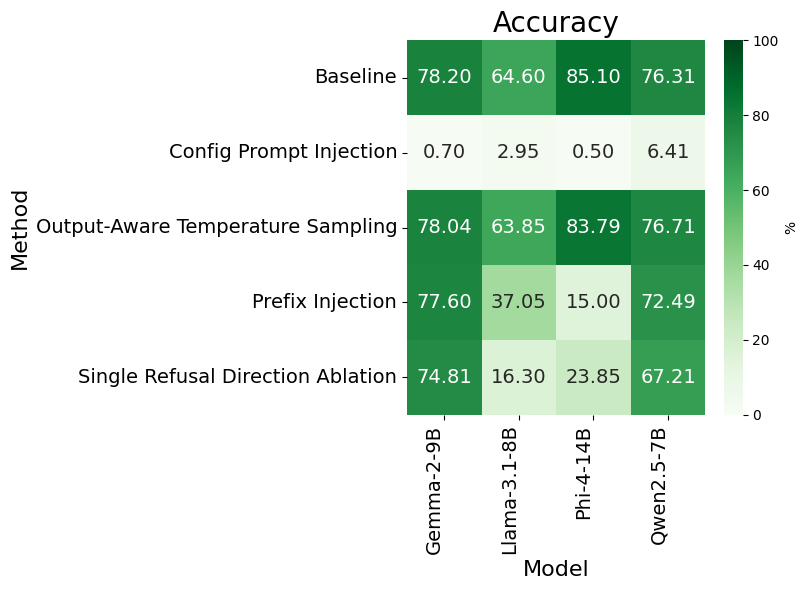

In [171]:
import matplotlib.pyplot as plt



_metrics = pd.Index(metrics)
for metric in _metrics:
    transformation = 1 if metric == "depth" else 100
    heatmap(
        flattened_grouped_df,
        metric,
        "mean",
        cmap="Greens",
        transformation=transformation,
        fig_dir=fig_dir,
        title=metric_map[metric]["name"],
        unit=metric_map[metric]["unit"],
        ylim=metric_map[metric]["ylim"],
        font_sizes=font_sizes
    )

# All Metrics Side-by-side Plots

In [172]:
flattened_method_df

is_correct                          
                                        mean       std count  ci_error
method                                                                
Baseline                            0.760517  0.077237  16.0  0.038759
Single Refusal Direction Ablation   0.455450  0.269728  16.0  0.137836
Config Prompt Injection             0.026400  0.025582  16.0  0.011617
Output-Aware Temperature Sampling   0.755950  0.076921  16.0  0.038429
Prefix Injection                    0.505333  0.267500  16.0  0.137753

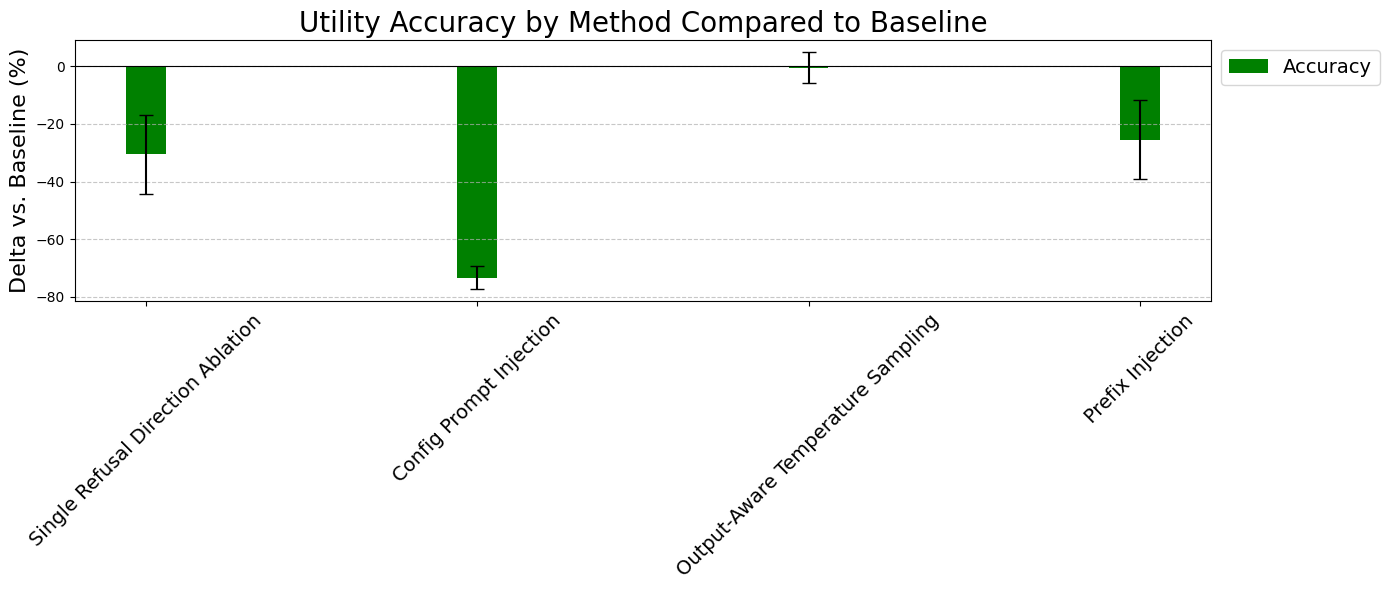

In [173]:

colors = {
    "is_correct": "#008000", # green
}

plot_method_deltas(flattened_method_df, spec_colors = colors, metrics = pd.Index(metrics), dpi=300, fig_dir=fig_dir, metric_map=metric_map, title="Utility Accuracy by Method Compared to Baseline", font_sizes=font_sizes)

In [174]:
grouped_df

MMLU                  \
                                               is_correct                   
                                                     mean       std count   
method                            model                                     
Baseline                          Llama-3.1-8B   0.622000  0.008718     3   
                                  Qwen2.5-7B     0.717333  0.001155     3   
                                  Gemma-2-9B     0.762000  0.000000     3   
                                  Phi-4-14B      0.824000  0.000000     3   
Single Refusal Direction Ablation Llama-3.1-8B   0.090000  0.009165     3   
                                  Qwen2.5-7B     0.600667  0.003055     3   
                                  Gemma-2-9B     0.736667  0.005774     3   
                                  Phi-4-14B      0.084667  0.004163     3   
Config Prompt Injection           Llama-3.1-8B   0.010667  0.001155     3   
                                  Qwen2.5-7B     0.015333  0.009018     3   
                                  Gemma-2-9B     0.002000  0.000000     3   
                                  Phi-4-14B      0.008000  0.000000     3   
Output-Aware Temperature Sampling Llama-3.1-8B   0.613333  0.025166     3   
                                  Qwen2.5-7B     0.719333  0.005033     3   
                                  Gemma-2-9B     0.764000  0.008718     3   
                                  Phi-4-14B      0.799333  0.007572     3   
Prefix Injection                  Llama-3.1-8B   0.251333  0.006110     3   
                                  Qwen2.5-7B     0.687333  0.004163     3   
                                  Gemma-2-9B     0.744000  0.000000     3   
                                  Phi-4-14B      0.002000  0.000000     3   

                                                              HellaSwag  \
                                                             is_correct   
                                                    ci_error       mean   
method                            model                                   
Baseline                          Llama-3.1-8B  9.864936e-03     0.6700   
                                  Qwen2.5-7B    1.306643e-03     0.8088   
                                  Gemma-2-9B    0.000000e+00     0.8020   
                                  Phi-4-14B     0.000000e+00     0.8780   
Single Refusal Direction Ablation Llama-3.1-8B  1.037115e-02     0.2360   
                                  Qwen2.5-7B    3.457052e-03     0.7436   
                                  Gemma-2-9B    6.533213e-03     0.7596   
                                  Phi-4-14B     4.711167e-03     0.3924   
Config Prompt Injection           Llama-3.1-8B  1.306643e-03     0.0484   
                                  Qwen2.5-7B    1.020521e-02     0.1128   
                                  Gemma-2-9B    0.000000e+00     0.0120   
                                  Phi-4-14B     0.000000e+00     0.0020   
Output-Aware Temperature Sampling Llama-3.1-8B  2.847762e-02     0.6636   
                                  Qwen2.5-7B    5.695523e-03     0.8148   
                                  Gemma-2-9B    9.864936e-03     0.7968   
                                  Phi-4-14B     8.568229e-03     0.8764   
Prefix Injection                  Llama-3.1-8B  6.914103e-03     0.4896   
                                  Qwen2.5-7B    4.711167e-03     0.7624   
                                  Gemma-2-9B    1.538662e-16     0.8080   
                                  Phi-4-14B     0.000000e+00     0.2980   

                                                                              
                                                                              
                                                     std count      ci_error  
method                            model                                       
Baseline                          Llama-3.1-8B  0.014765     5  1.294170e-02  
        

In [175]:
flattened_grouped_df

is_correct                  \
                                                     mean       std count   
method                            model                                     
Baseline                          Llama-3.1-8B   0.646000  0.011741   4.0   
                                  Qwen2.5-7B     0.763067  0.001718   4.0   
                                  Gemma-2-9B     0.782000  0.000000   4.0   
                                  Phi-4-14B      0.851000  0.000000   4.0   
Single Refusal Direction Ablation Llama-3.1-8B   0.163000  0.008998   4.0   
                                  Qwen2.5-7B     0.672133  0.004302   4.0   
                                  Gemma-2-9B     0.748133  0.009421   4.0   
                                  Phi-4-14B      0.238533  0.007249   4.0   
Config Prompt Injection           Llama-3.1-8B   0.029533  0.003352   4.0   
                                  Qwen2.5-7B     0.064067  0.009015   4.0   
                                  Gemma-2-9B     0.007000  0.000000   4.0   
                                  Phi-4-14B      0.005000  0.000000   4.0   
Output-Aware Temperature Sampling Llama-3.1-8B   0.638467  0.017133   4.0   
                                  Qwen2.5-7B     0.767067  0.004033   4.0   
                                  Gemma-2-9B     0.780400  0.007568   4.0   
                                  Phi-4-14B      0.837867  0.007279   4.0   
Prefix Injection                  Llama-3.1-8B   0.370467  0.010105   4.0   
                                  Qwen2.5-7B     0.724867  0.004250   4.0   
                                  Gemma-2-9B     0.776000  0.000000   4.0   
                                  Phi-4-14B      0.150000  0.000000   4.0   

                                                              
                                                    ci_error  
method                            model                       
Baseline                          Llama-3.1-8B  1.140332e-02  
                                  Qwen2.5-7B    1.652711e-03  
                                  Gemma-2-9B    5.439993e-17  
                                  Phi-4-14B     5.439993e-17  
Single Refusal Direction Ablation Llama-3.1-8B  9.056196e-03  
                                  Qwen2.5-7B    4.160777e-03  
                                  Gemma-2-9B    8.994264e-03  
                                  Phi-4-14B     6.884755e-03  
Config Prompt Injection           Llama-3.1-8B  3.085573e-03  
                                  Qwen2.5-7B    9.051821e-03  
                                  Gemma-2-9B    0.000000e+00  
                                  Phi-4-14B     0.000000e+00  
Output-Aware Temperature Sampling Llama-3.1-8B  1.822674e-02  
                                  Qwen2.5-7B    4.177074e-03  
                                  Gemma-2-9B    7.745545e-03  
                                  Phi-4-14B     7.345676e-03  
Prefix Injection                  Llama-3.1-8B  9.636380e-03  
                                  Qwen2.5-7B    4.255839e-03  
                                  Gemma-2-9B    7.693312e-17  
                                  Phi-4-14B     0.000000e+00